In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ba_data= pd.read_csv("E:/BA/airline_review.csv")
ba_data.head()

,Unnamed: 0,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,I take comfort in reading the last ten or so...,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified


In [2]:
ba_data.drop(columns=['Unnamed: 0'], inplace=True)

#### Data Wrangling

Step A : Data Discovery/exploration is to get familiarity with the data before proceeding to the next steps

In [3]:
ba_data['date'] = pd.to_datetime(ba_data.date)
ba_data['date_flown'] = pd.to_datetime(ba_data.date_flown)
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               3616 non-null   int64         
 1   header               3616 non-null   object        
 2   author               3616 non-null   object        
 3   date                 3616 non-null   datetime64[ns]
 4   place                3616 non-null   object        
 5   content              3616 non-null   object        
 6   aircraft             1902 non-null   object        
 7   traveller_type       2895 non-null   object        
 8   seat_type            3614 non-null   object        
 9   route                2891 non-null   object        
 10  date_flown           2888 non-null   datetime64[ns]
 11  seat_comfort         3616 non-null   int64         
 12  cabin_staff_service  3616 non-null   int64         
 13  food_beverages       3616 non-nul

1. There are six columns that contain NULL values in them. The most being in the aircraft column and the least being in the seat type
2. Column names might need to be changed to make it easily undertandable.
3. There are 18 features here and investigation needs to be done whether all the columns contain useful data. 

In [4]:
ba_data.describe()

,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
count,3616.00000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,4.72677,2.745852,3.101770,2.324668,1.956858,2.680586,1.504425
std,3.17790,1.504391,1.659588,1.776194,2.030015,1.471356,2.046616
min,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.00000,1.000000,2.000000,1.000000,1.000000,1.000000,-1.000000
50%,4.00000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000
75%,8.00000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000
max,10.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
ba_data.describe(include=['O'])

,header,author,place,content,aircraft,traveller_type,seat_type,route,recommended,trip_verified
count,3616,3616,3616,3616,1902,2895,3614,2891,3616,2142
unique,2648,2536,71,3557,200,4,4,1578,2,2
top,British Airways customer review,1 reviews,United Kingdom,Booked a British Airways holiday so that's fli...,A320,Couple Leisure,Economy Class,London to Johannesburg,no,Verified
freq,906,118,2275,3,355,980,1879,17,2162,1899


In [6]:
ba_data.drop(columns=['author'], inplace=True)

<Axes: >

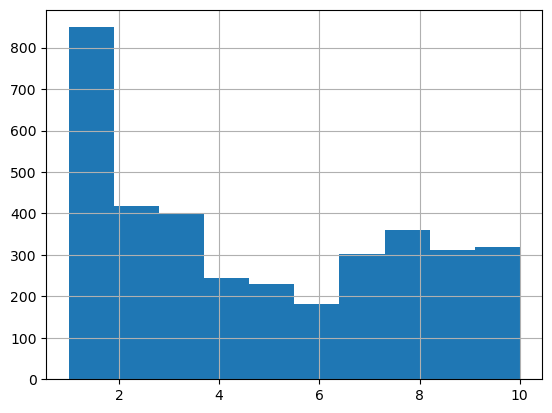

In [7]:
ba_data.rating.hist()

In [8]:
print(ba_data.date.min(), ba_data.date.max())

2012-08-29 00:00:00 2023-10-03 00:00:00


In [9]:
len(ba_data.place.unique())

71

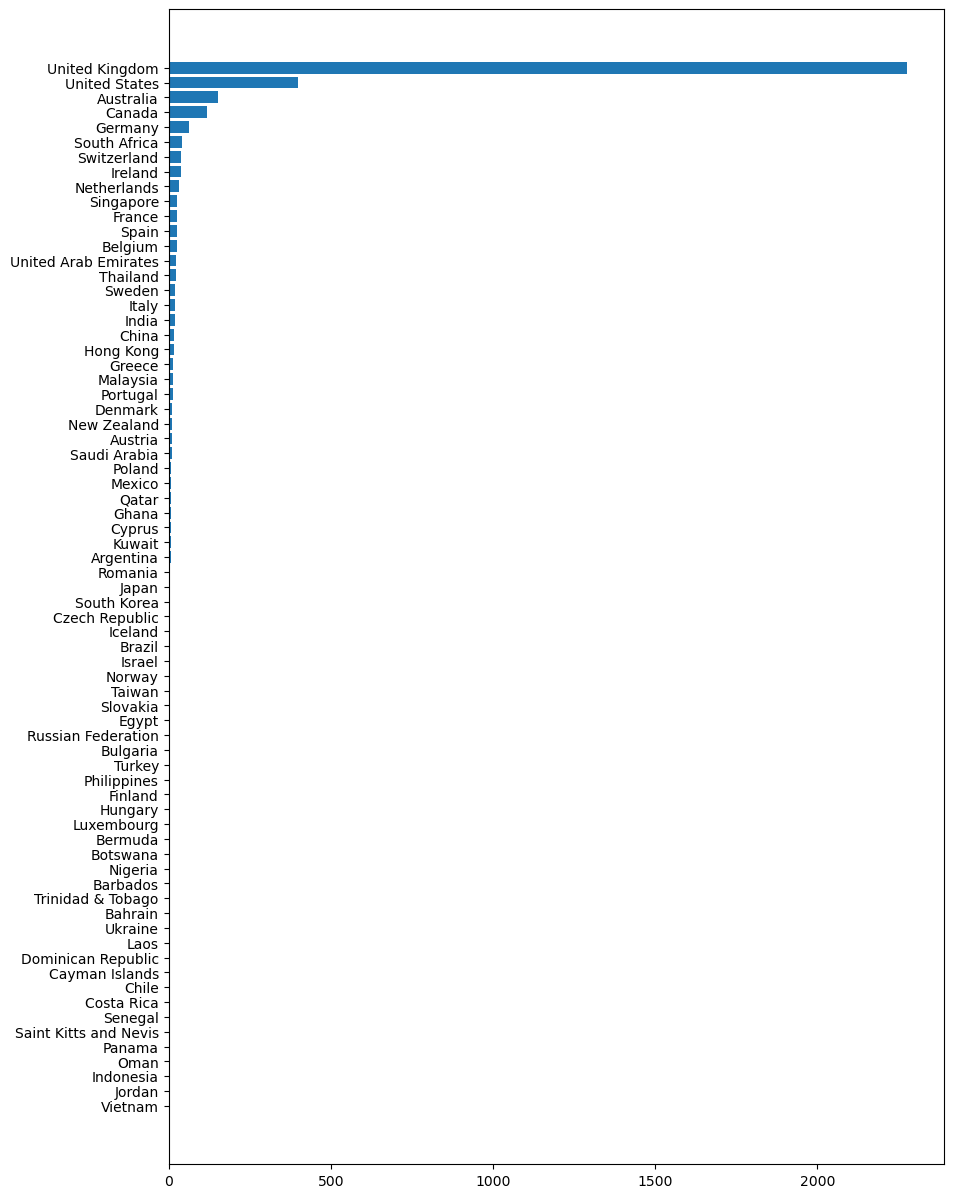

In [10]:
plt.figure(figsize=(10,15))
grouped=ba_data.groupby('place').count().reset_index().sort_values('rating', ascending=True)
plt.barh(y=grouped['place'], width=grouped['rating'])
plt.show()

Australia, Canada, US and the UK are the ones with 90% of the review logs.

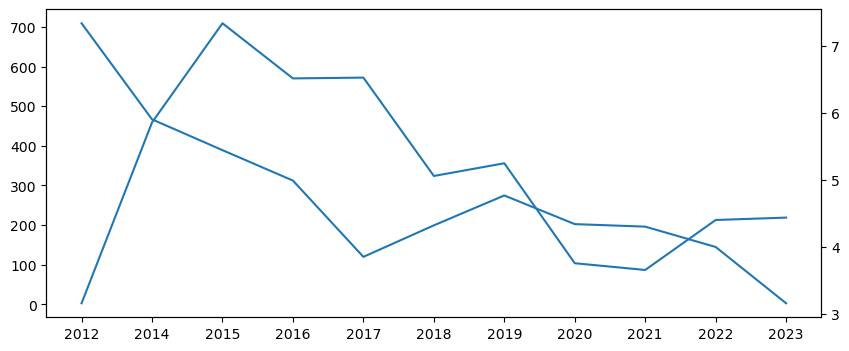

In [11]:
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx() 
ba_data['year']=ba_data.date.dt.strftime("%Y")
grouped= ba_data.groupby('year').agg(
    rows_count = ('date', 'count'),
    rt_avg = ('rating', np.mean)
)
ax1.plot(grouped.rows_count)
ax2.plot(grouped.rt_avg)
plt.show()

We see that as we move into more recent times, the number of reviews have reduced and the ratings are changin too.

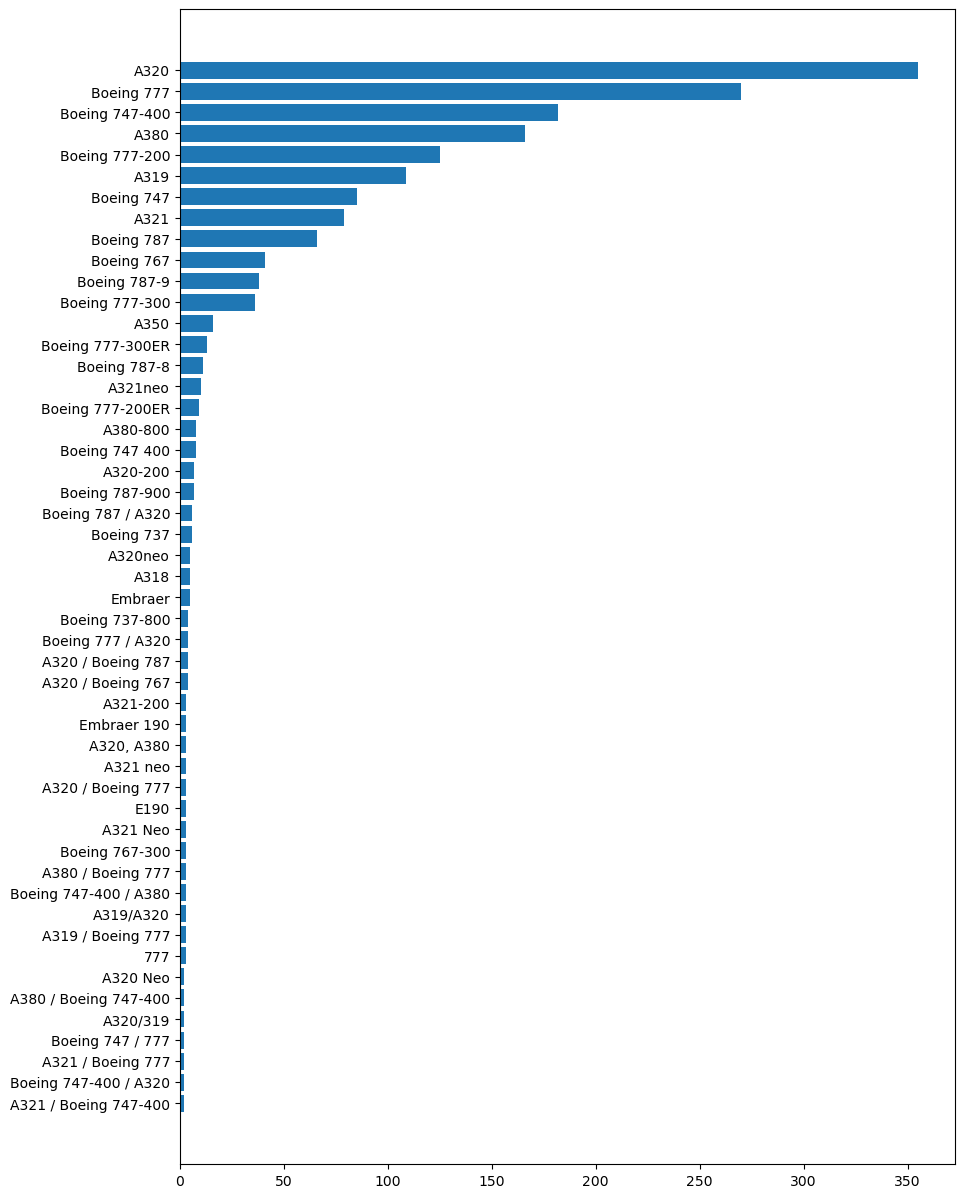

In [12]:
plt.figure(figsize=(10,15))
grouped=ba_data.groupby('aircraft')['rating'].count().reset_index().sort_values(by='rating', ascending=True).tail(50)
plt.barh(y=grouped['aircraft'], width=grouped['rating'])
plt.show()

Only the top 50 flights are having reviews written for them out of the 1902 aircaraft type entries, others have Null entries.

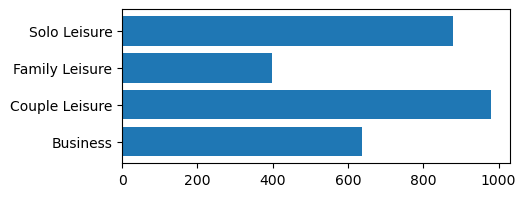

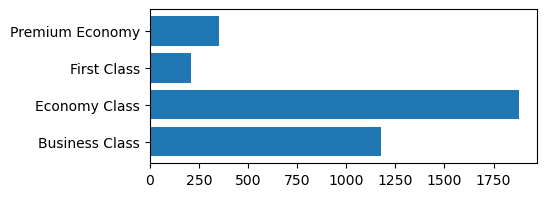

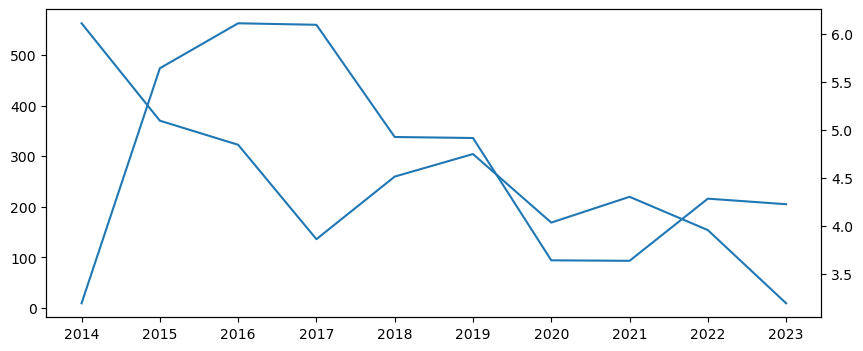

In [13]:
plt.figure(figsize=(5,2))
grouped=ba_data.groupby('traveller_type')['rating'].count().reset_index()
plt.barh(y=grouped['traveller_type'], width=grouped['rating'])
plt.show()


plt.figure(figsize=(5,2))
grouped=ba_data.groupby('seat_type')['rating'].count().reset_index()
plt.barh(y=grouped['seat_type'], width=grouped['rating'])
plt.show()

fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx() 
ba_data['year_flown']=ba_data.date_flown.dt.strftime("%Y")
grouped= ba_data.groupby('year_flown').agg(
    rows_count = ('date', 'count'),
    rt_avg = ('rating', np.mean)
)
ax1.plot(grouped.rows_count)
ax2.plot(grouped.rt_avg)
plt.show()

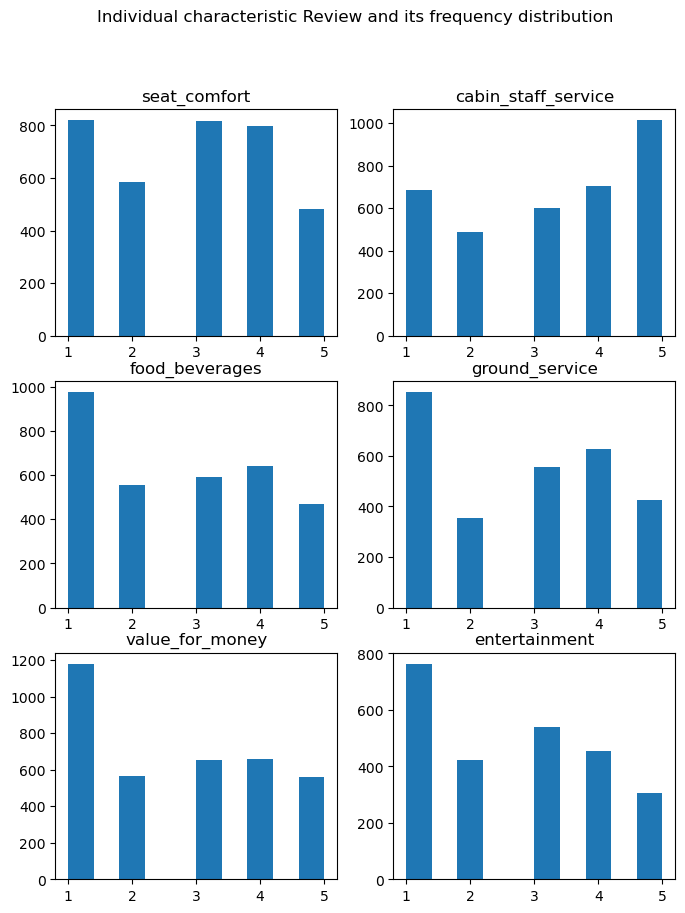

In [14]:
fig, axes = plt.subplots(3,2, figsize=(8,10))
fig.suptitle('Individual characteristic Review and its frequency distribution')
col_list=['seat_comfort','cabin_staff_service','food_beverages','ground_service','value_for_money','entertainment']
j=0
for i in axes.flat:
    i.set_title(f'{col_list[j]}')
    i.hist(ba_data[ba_data[f'{col_list[j]}']>-1][f'{col_list[j]}'])
    j+=1

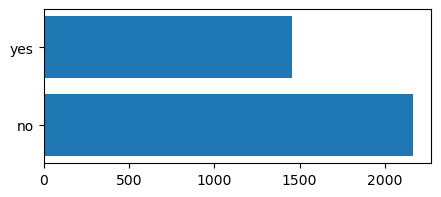

In [15]:
plt.figure(figsize=(5,2))
grouped=ba_data.groupby('recommended')['rating'].count().reset_index()
plt.barh(y=grouped['recommended'], width=grouped['rating'])
plt.show()

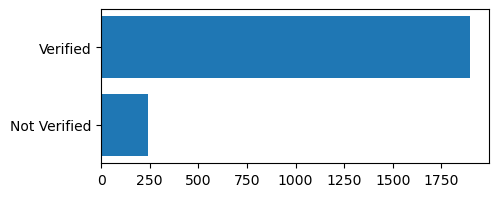

In [16]:
plt.figure(figsize=(5,2))
grouped=ba_data.groupby('trip_verified')['rating'].count().reset_index()
plt.barh(y=grouped['trip_verified'], width=grouped['rating'])
plt.show()

In [17]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               3616 non-null   int64         
 1   header               3616 non-null   object        
 2   date                 3616 non-null   datetime64[ns]
 3   place                3616 non-null   object        
 4   content              3616 non-null   object        
 5   aircraft             1902 non-null   object        
 6   traveller_type       2895 non-null   object        
 7   seat_type            3614 non-null   object        
 8   route                2891 non-null   object        
 9   date_flown           2888 non-null   datetime64[ns]
 10  seat_comfort         3616 non-null   int64         
 11  cabin_staff_service  3616 non-null   int64         
 12  food_beverages       3616 non-null   int64         
 13  ground_service       3616 non-nul

#### Insights from all the EDA done so far:
1. There are total 20 variables present, 18 if the date transformed variables are not considered. We have a total of 7 quant variables and 2 date variables, 9 categorical variables.
2. All 9 categorical variables are nominal variables.
3. **NULLs and Missing Data**:
    1. There are 6 NULL columns and of them aircraft type has the lowest number of non null and it is an important column so we will need to find a way to recitfy it.
    2. Route is not something we will be focusing on currently.
    3. Seat type has just two missing columns so we can reduce the entire dataset rows by 2.
    4. dateflown column has also few missing values, we can impute values using the other date column.
    5. Trip verified column also has to be rectified by assuming missing ones as verified/not-verified, but we will have to make the decision of using it in our analysis.
4. **Insights from univariate analysis**:
    1. Average overall customer rating falls around 4.7/10
    2. Out of 71 unique countries present in the place column more than 90% reviews are from UK, US, Canada, Australia.
    3. We have reviews that have been recorded from 2012 to 2023, and year on year the number of reviews recorded have been decreasing.
    4. From the aricraft type, we notice that A320 is the most common, then comes Boeing 777. There are many NULLs present. Some entries have multiple aircraft type recorded.
    5. Solo, Couple liesure and Economy, Business class passengers are the most common reviewers present in the dataset.
    6. Cabin staff and seat comfort review has postive rating distribution than the rest.

### Rectifying Missing Values

In [18]:
#dropped null values from seat type column
ba_data.drop(ba_data[ba_data.seat_type.isna()].index, inplace=True)

In [19]:
diff = ba_data[ba_data.date_flown.isna()==False]['date']-ba_data[ba_data.date_flown.isna()==False]['date_flown']

In [20]:
diff.mean()

Timedelta('35 days 23:56:00.581918947')

In [21]:
#using mean delta value for filling up the na columns in the date_flown column
ba_data.date_flown.fillna(ba_data[ba_data.date_flown.isna()]['date']+diff.mean(), inplace=True) 

In [27]:
ba_data.trip_verified.fillna('Verified', inplace=True)

In [29]:
ba_data['year_flown']=ba_data.date_flown.dt.strftime("%Y")
ba_data['year']=ba_data.date.dt.strftime("%Y")
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 0 to 3615
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               3614 non-null   int64         
 1   header               3614 non-null   object        
 2   date                 3614 non-null   datetime64[ns]
 3   place                3614 non-null   object        
 4   content              3614 non-null   object        
 5   aircraft             1902 non-null   object        
 6   traveller_type       2894 non-null   object        
 7   seat_type            3614 non-null   object        
 8   route                2890 non-null   object        
 9   date_flown           3614 non-null   datetime64[ns]
 10  seat_comfort         3614 non-null   int64         
 11  cabin_staff_service  3614 non-null   int64         
 12  food_beverages       3614 non-null   int64         
 13  ground_service       3614 non-nul

In [30]:
ba_data[['seat_type','traveller_type']].describe(include=['O'])

,seat_type,traveller_type
count,3614,2894
unique,4,4
top,Economy Class,Couple Leisure
freq,1879,980


In [48]:
#we have already filled NULL for most of the column and since we are not modelling with other columns, we will not be filling missing values
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 0 to 3615
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               3614 non-null   int64         
 1   header               3614 non-null   object        
 2   date                 3614 non-null   datetime64[ns]
 3   place                3614 non-null   object        
 4   content              3614 non-null   object        
 5   aircraft             1902 non-null   object        
 6   traveller_type       2894 non-null   object        
 7   seat_type            3614 non-null   object        
 8   route                2890 non-null   object        
 9   date_flown           3614 non-null   datetime64[ns]
 10  seat_comfort         3614 non-null   int64         
 11  cabin_staff_service  3614 non-null   int64         
 12  food_beverages       3614 non-null   int64         
 13  ground_service       3614 non-nul

In [55]:
ba_data.to_csv("E:/BA/airline_review_cleaned.csv")